Assignment by Christine Ann Dejito

# Assignment
---
Read about (Susanna Epp pp. 704):
1. Kruskal's Algorithm
2. Prim's Algorithm
3. Dijkstra’s Shortest Path Algorithm

Given the following graph, implement the algorithm in Python.

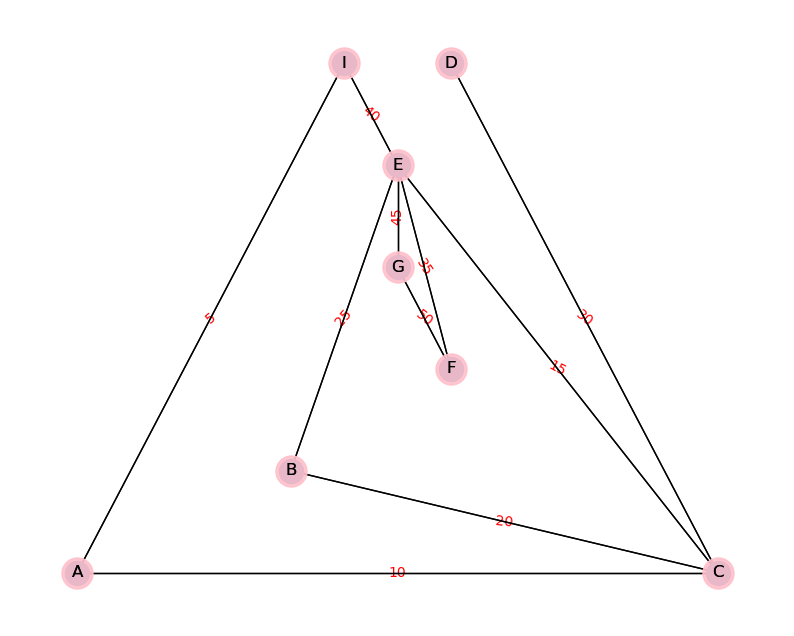

In [93]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

### 1. Kruskal's Algorithm Implementation

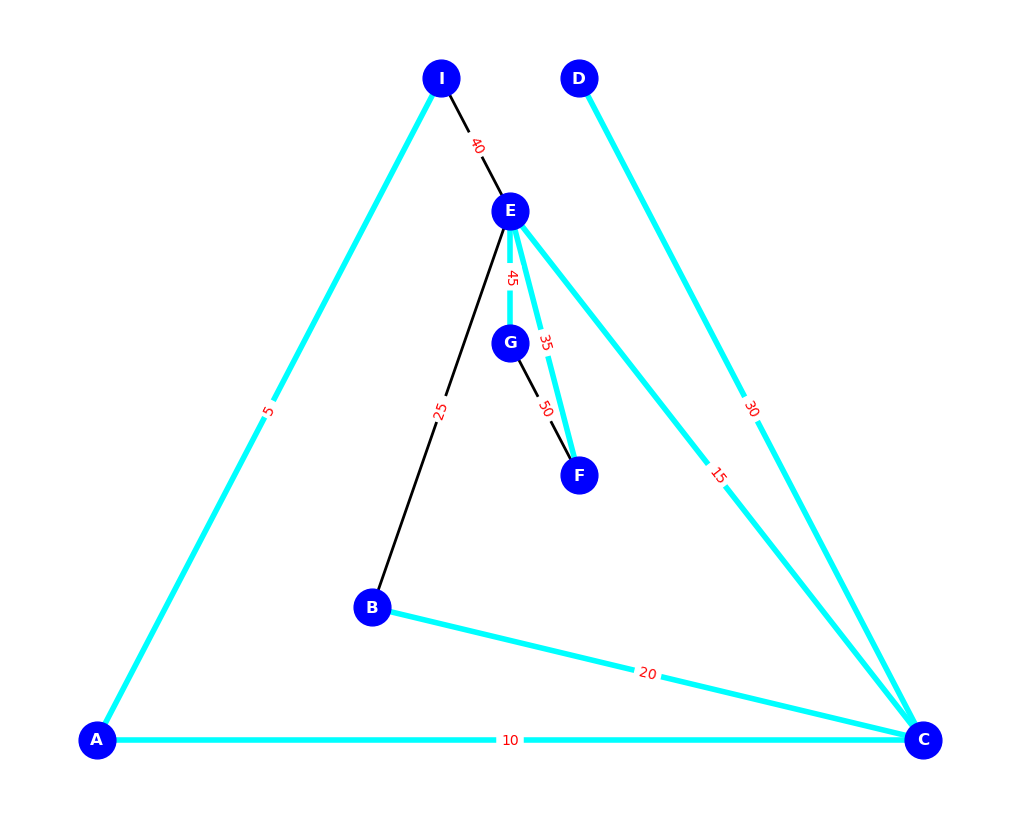

In [46]:
import matplotlib.pyplot as plt
import networkx as nx

# Define Kruskal's algorithm function
def custom_kruskal(graph):
    # Initialize the minimum spanning tree
    custom_MST = nx.Graph()
    # Sort edges by weight
    sorted_edges = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'])
    # Create a disjoint set data structure
    disjoint_set = {node: {node} for node in graph.nodes()}
    
    # Iterate through the sorted edges
    for u, v, data in sorted_edges:
        if find(disjoint_set, u) != find(disjoint_set, v):
            # Add the edge to the minimum spanning tree
            custom_MST.add_edge(u, v, **data)
            # Merge the sets containing u and v
            union(disjoint_set, u, v)
            
    return custom_MST

# Define helper functions for disjoint set
def find(disjoint_set, node):
    return next(iter([k for k, v in disjoint_set.items() if node in v]))

def union(disjoint_set, u, v):
    root_u = find(disjoint_set, u)
    root_v = find(disjoint_set, v)
    if root_u != root_v:
        disjoint_set[root_u].update(disjoint_set[root_v])
        del disjoint_set[root_v]

# Create the figure size
plt.figure(figsize=(10, 8))

# Define the graph
custom_graph = nx.Graph()
custom_graph.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "I"])
custom_edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)]
custom_graph.add_weighted_edges_from(custom_edgelist)

# Run Kruskal's algorithm
custom_MST = custom_kruskal(custom_graph)

# Draw the original graph
pos = nx.planar_layout(custom_graph)
nx.draw(custom_graph, pos, with_labels=True, node_size=700, node_color='blue', font_size=12, font_color="white", font_weight='bold', edge_color='black', width=2)

# Draw the minimum spanning tree
nx.draw_networkx_edges(custom_MST, pos=pos, edge_color='cyan', width=4)

# Display edge labels
edge_labels = nx.get_edge_attributes(custom_graph, 'weight')
nx.draw_networkx_edge_labels(custom_graph, pos=pos, edge_labels=edge_labels, font_color='red')

plt.show()


### 2. Prim's Algorithm Implementation

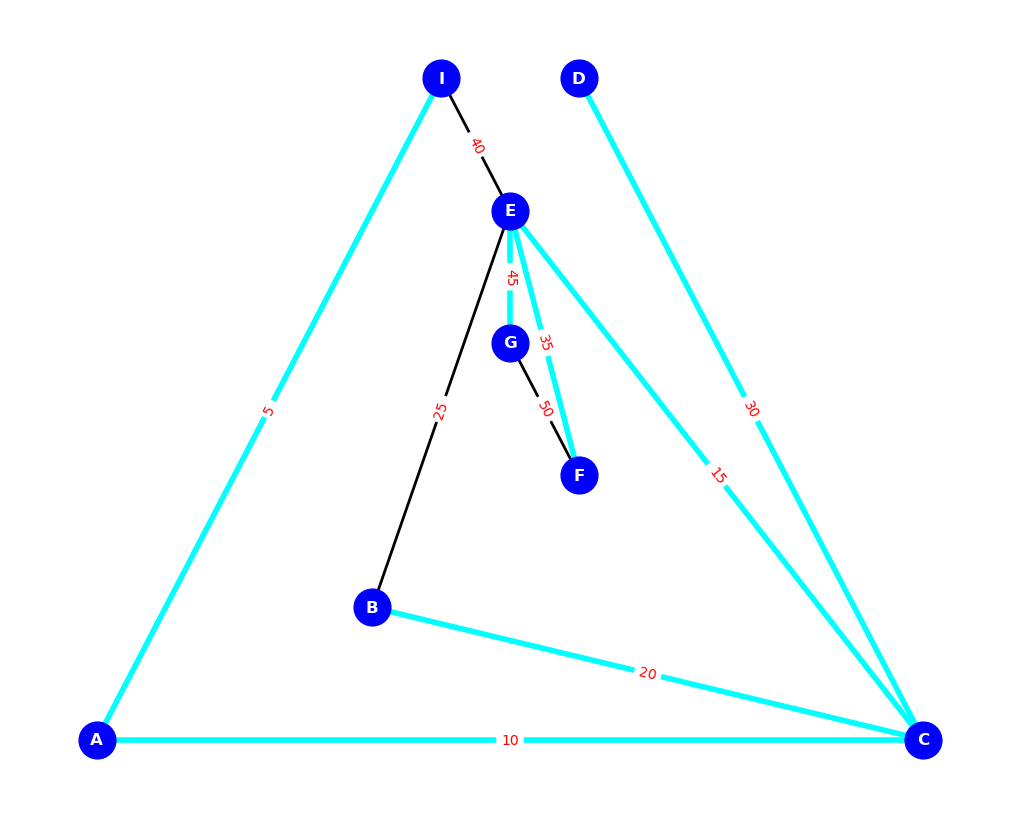

In [56]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

# Create the figure size
plt.figure(figsize=(10, 8))

# Create the graph
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "I"])
edgelist = [
    ("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15),
    ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35),
    ("F", "G", 50), ("G", "E", 45)
]
G.add_weighted_edges_from(edgelist)

def prim(graph):
    MST = set()  # Minimum spanning tree
    key = {v: float('inf') for v in graph.nodes()}
    parent = {v: None for v in graph.nodes()}
    pq = []  # Priority queue (min heap)

    start_vertex = list(graph.nodes())[0]
    key[start_vertex] = 0
    heapq.heappush(pq, (0, start_vertex))

    while pq:
        weight, u = heapq.heappop(pq)
        MST.add(u)

        for v in graph.neighbors(u):
            edge_weight = graph[u][v]['weight']
            if v not in MST and edge_weight < key[v]:
                key[v] = edge_weight
                parent[v] = u
                heapq.heappush(pq, (edge_weight, v))

    return parent

# Compute MST using Prim's algorithm
MST_parent = prim(G)

# Draw the original graph
pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='blue', font_size=12, font_color="white", font_weight='bold', edge_color='black', width=2)

# Draw the minimum spanning tree
MST_edges = [(u, v) for v, u in MST_parent.items() if u is not None]
nx.draw_networkx_edges(G, pos=pos, edgelist=MST_edges, edge_color='cyan', width=4)

# Display edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='red')

plt.show()


### 3. Dijkstra’s Shortest Path Algorithm Implementation

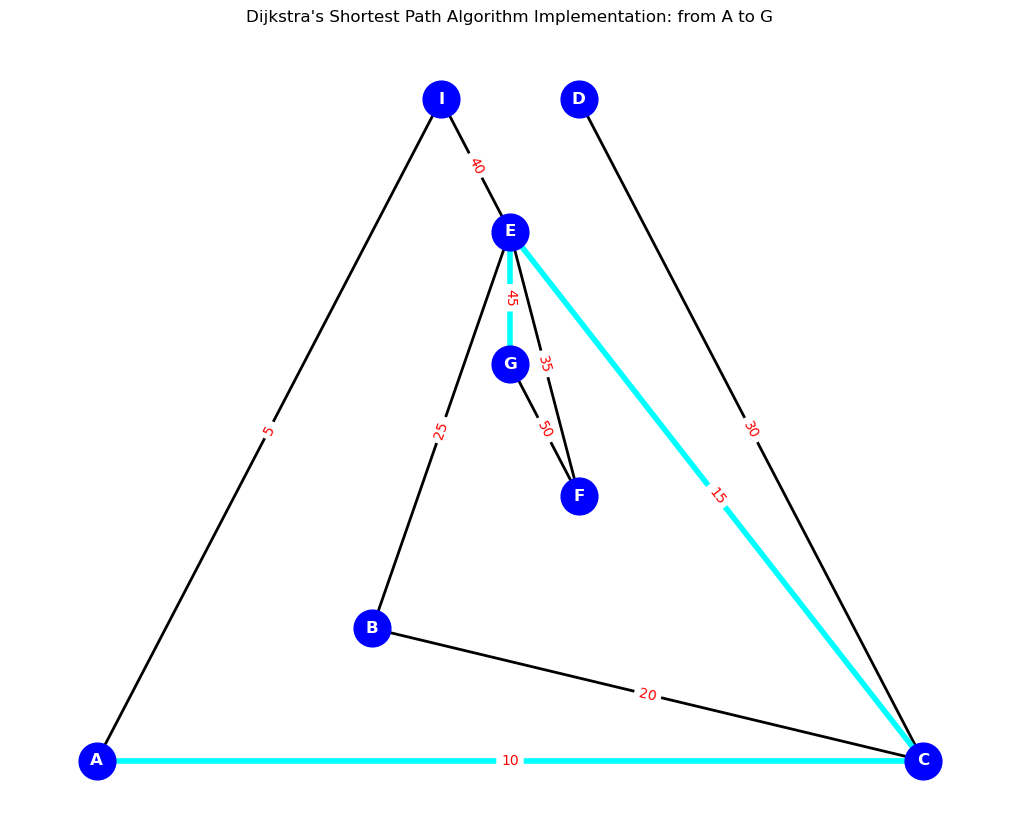

In [110]:
import matplotlib.pyplot as plt
import networkx as nx

# Create graph
graph = {
    "A": {"C": 10, "I": 5},
    "C": {"A": 10, "B": 20, "E": 15, "D": 30},
    "B": {"C": 20, "E": 25},
    "E": {"C": 15, "B": 25, "F": 35, "G": 45},
    "D": {"C": 30},
    "F": {"E": 35, "G": 50},
    "G": {"E": 45},
    "I": {"A": 5, "E": 40}
}

# Calculate shortest paths using Dijkstra's algorithm
def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    visited = set()
    queue = [(0, start)]

    while queue:
        current_dist, current_node = queue.pop(0)

        if current_node not in visited:
            visited.add(current_node)

            for neighbor, weight in graph[current_node].items():
                distance = current_dist + weight
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    queue.append((distance, neighbor))

    return distances

shortest_paths = dijkstra(graph, "A")
target_node = "G"
path = [target_node]
while target_node != "A":
    prev_node = min(graph[target_node], key=lambda node: shortest_paths[node])
    path.append(prev_node)
    target_node = prev_node

# Create the graph
G = nx.Graph()
plt.figure(figsize=(10, 8))

# Add nodes
G.add_nodes_from(graph.keys())

# Add edges with weights
for node, neighbors in graph.items():
    for neighbor, weight in neighbors.items():
        G.add_edge(node, neighbor, weight=weight)

# Create a subgraph for the shortest path
path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
path_graph = G.edge_subgraph(path_edges)

# Get edge labels
edge_labels = {(u, v): G[u][v]["weight"] for u, v in G.edges()}

# Draw the graph
pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels=True, node_color="blue", node_size=700, font_size=12, font_color="white", font_weight="bold", edge_color="black", width=2)
nx.draw_networkx_edges(path_graph, pos, edge_color="cyan", width=4)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")
plt.title("Dijkstra's Shortest Path Algorithm Implementation: from A to G")
plt.show()
